Notebook to test implementation of workplace free parking (cars & motorcycles) in places.py

In [1]:
%load_ext autoreload
%autoreload 2
from od.place import Place
import geopandas as gpd
import pandas as pd
import osmnx as ox
import numpy as np

In [2]:
place_name = 'Konstanz, Germany'
city = Place(place_name)

Data not in db, computing


In [8]:
city.load_all()

Data not in db, computing
Data not in db, computing
Data not in db, computing


In [12]:
city.data.head()
city.data.to_csv('parkingcheck.csv')

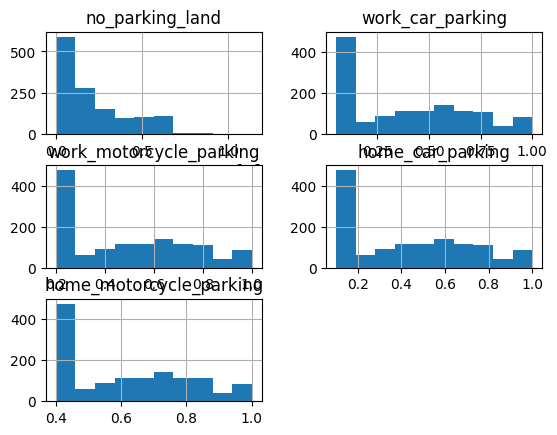

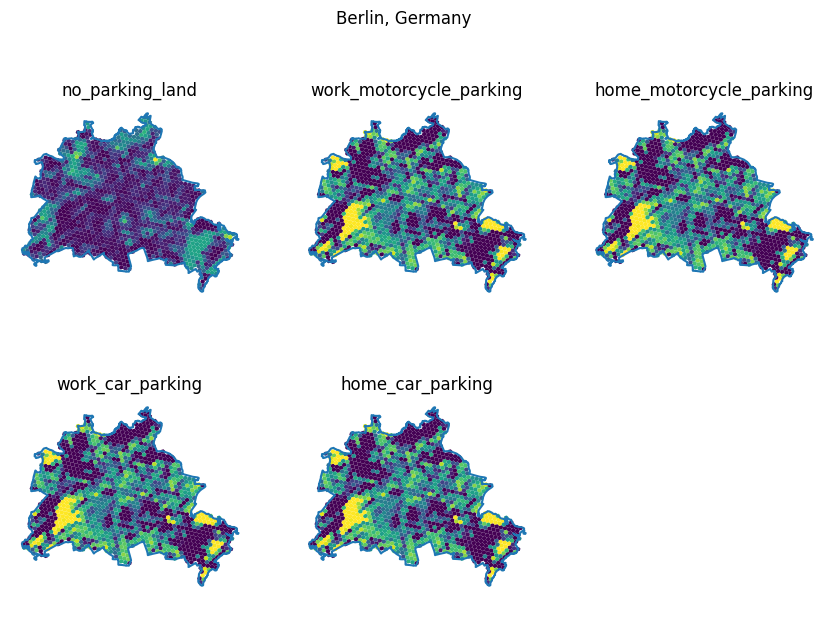

In [13]:
# city.data.head()
# city.data.plot('work_car_parking')
# city.data.plot('home_motorcycle_parking')
city.data.hist([i for i in city.data.keys() if 'parking' in i])
city.plot_zoning([i for i in city.data.keys() if 'parking' in i], save_name='parking_types')
# [i for i in city.data.keys() if 'parking' in i]+['parking']
# [i for i in city.parking.keys()]

1.7504762880651656 0.0


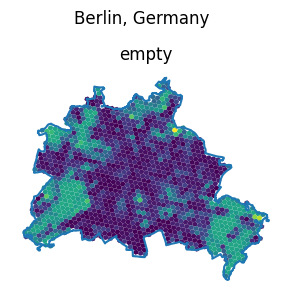

In [14]:
print(max(city.data['bldg_density']), min(city.data['bldg_density']))
# df = city.data[city.data['building_density']>=0.35]
# df.head()
# city.plot_zoning[1195],plot()
city.plot_zoning(['empty'])

In [15]:
city.plot_zoning([i for i in city.zones.keys() if 'building_density' in i]+['building_density'], save_name='building_density')

AssertionError: The column building_density does not exists in the loaded data.

In [ ]:
zone = city.zones['work_industrial']
tags =  {'landuse': ['construction']}
zoi = ox.features_from_place(city.name, tags)
ax = city.shape.boundary.plot(color='white')
zone.plot(ax=ax, zorder=1, color='orange', markersize=10)

In [ ]:
from od.variables import parking_prob

prkg_locations = parking_prob.keys()
prkg_vehicles = parking_prob['workplace'].keys()

def parking(dsty, prkg_locations, prkg_vehicles):
    df = pd.DataFrame()
    cols = []
    dict = {}
    for p in prkg_locations:
        for v in prkg_vehicles:
            
            # print(p, v)
            # print(parking_prob[p][v])
            min_prob_bldg_dsty = parking_prob[p][v]['min_prob_bldg_dsty']
            min_prob = parking_prob[p][v]['min_prob']
            max_prob_bldg_dsty = parking_prob[p][v]['max_prob_bldg_dsty']
            max_prob = parking_prob[p][v]['max_prob']
            
            if dsty >= min_prob_bldg_dsty:
                prob =  min_prob

            elif dsty <= max_prob_bldg_dsty:
                prob = max_prob
            
            else: # min_prob_bldg_dsty > dsty > max_prob_bldg_dsty:
                prob = np.round( max_prob - (max_prob - min_prob) * (dsty - max_prob_bldg_dsty)/(min_prob_bldg_dsty - max_prob_bldg_dsty), 4)
            
            dict[p + '-' + v] = prob
           
            # col = {p + ' ' + v : prob}
            # cols = cols.append(col)
            # df = pd.concat([df, pd.DataFrame(new_row, columns=new_row.keys)], ignore_index=True)

    return dict

# print(parking(dsty,prkg_locations, prkg_vehicles))
df = pd.DataFrame()

dict = parking(dsty,prkg_locations,prkg_vehicles)
print(dict)

# df_dict = pd.DataFrame({'name':dict.keys(), 'value':dict.values()})
# df_dict = pd.DataFrame.from_dict(dict, orient='columns',index)
# df_dict = pd.DataFrame.from_dict(dict, orient='columns',index)
# df_dict = pd.DataFrame(dict, index=[0])
# df_dict
for dsty in np.arange(0.0, 1.0, 0.01):
    # print(parking(dsty,prkg_locations,prkg_vehicles))
    dict = parking(dsty,prkg_locations,prkg_vehicles)
    df_dict = pd.DataFrame(dict, index=[0])
    df = pd.concat([df, df_dict], ignore_index=True)

df
df.plot()

In [ ]:
            # self.parking = {
            #     'work_car_parking': dict['workplace_car'],
            #     'work_motorcycle_parking': dict['workplace_motorcycle'],
            #     'home_car_parking': dict['home_car'],
            #     'home_motorcycle_parking': dict['home_motorcycle']
            # }